### Contexto del problema:
Encuentra las mejores estrategias para mejorar para la próxima campaña de marketing. ¿Cómo puede la institución financiera tener una mayor efectividad para futuras campañas de marketing? Para responder a esto, debemos analizar la última campaña de marketing que realizó el banco e identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras.
* source del dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#cargamos El DataSet
path='C:/Users/oscar/Downloads/bank-additional/bank-additional-full.csv'
data=pd.read_csv(path, sep=';')
data.shape

(41188, 21)

In [3]:
#vamos a ver los tipos de dato que tenemos en el dataset
# como sabemos que este es un problema de clasificacion
# es proble que haya mas variables categoricas que numericas.
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Analizaremos las siguientes features:
* ##### 1.- Analisisi General:
    * 1.1.- Age
    * 1.2- Ocupation
    * 1.3.- Marital
    * 1.4.- Education
    * 1.5.- Default(has a credit?), House(housing loan?), Loan(personal Loan)
    * 1.6.- 6.- contact, month, day_week
* ##### 2.- Feature importance
* ##### 3.- Train Model
* ##### 4.- Evaluate model

### 1.1- Age
 * intentaremos encontrar informacion util de este campo

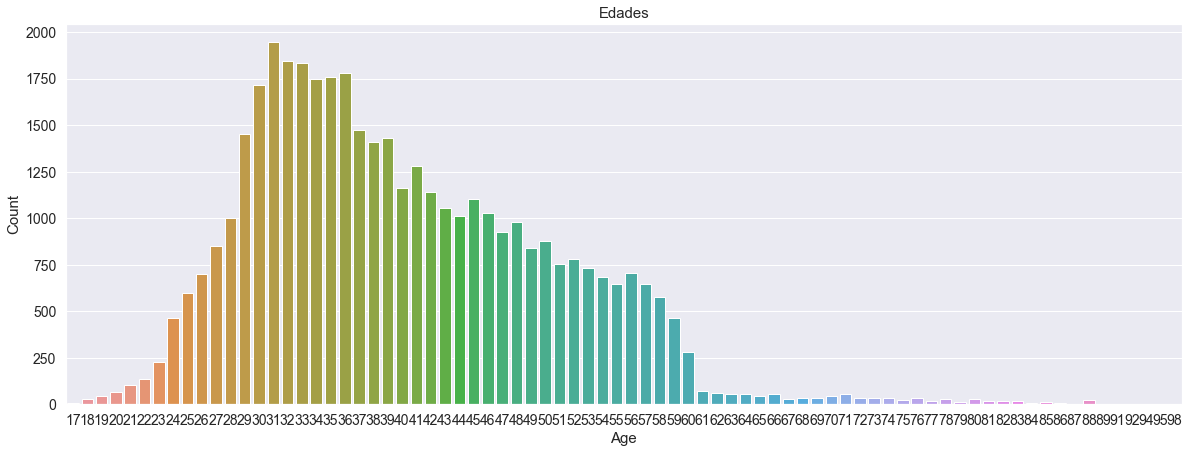

In [4]:
fig,ax = plt.subplots()
fig.set_size_inches(20,7)
sns.countplot(x ='age', data =data)
ax.set_xlabel('Age', fontsize =15)
ax.set_ylabel('Count', fontsize =15)
ax.set_title('Edades', fontsize = 15)
ax.tick_params(labelsize =14)

Text(0.5, 1.0, 'Age distribution')

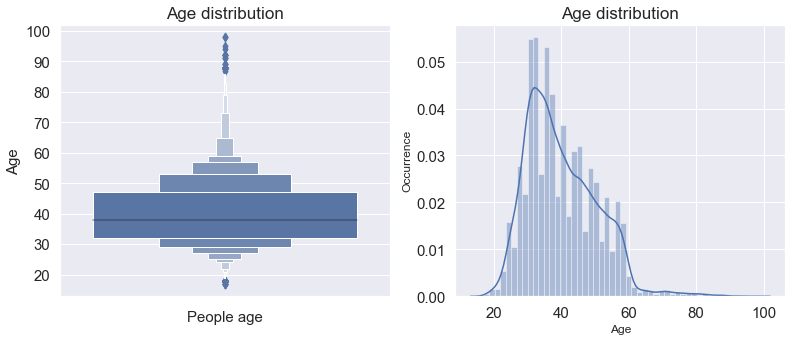

In [5]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (13,5))

sns.boxenplot(x ='age',data = data, orient = 'v', ax =ax1)
ax1.set_xlabel('People age', fontsize = 15)
ax1.set_ylabel('Age', fontsize =15)
ax1.tick_params(labelsize =15)
ax1.set_title('Age distribution', fontsize =17)

sns.distplot(data['age'], ax=ax2)
ax2.set_xlabel('Age', fontsize = 12)
ax2.set_ylabel('Occurrence', fontsize=12)
ax2.tick_params(labelsize =15)
ax2.set_title('Age distribution', fontsize =17)


In [6]:
print('1° Cuartil: ', data['age'].quantile(q = 0.25))
print('2° Cuartil: ', data['age'].quantile(q = 0.50))
print('3° Cuartil: ', data['age'].quantile(q = 0.75))

#Calculo de outliers:

    #Interquartile , IQR = Q3 -Q1
IQR = data['age'].quantile(q = 0.75)- data['age'].quantile(q = 0.25)

    # lower 1.5 * IQR whiskers = Q1 - 1.5 * IQR
LowerOut = data['age'].quantile(q = 0.25) - 1.5 *IQR
    # Upper 1.5 * IQR  whiskers = Q3 + 1.5 * IQR
UpperOut = data['age'].quantile(q = 0.75) + 1.5 *IQR
print('Edades arriba de: ',UpperOut, 'son Outliers')
print('Edades bajo : ',LowerOut, 'son Outliers')

1° Cuartil:  32.0
2° Cuartil:  38.0
3° Cuartil:  47.0
Edades arriba de:  69.5 son Outliers
Edades bajo :  9.5 son Outliers


In [7]:
print('Numero de outliers: ', data[data['age'] > 69]['age'].count())
print('Numero de datos: ',data.shape[0])
print('Porcentaje de Outliers: ',((data[data['age'] > 69]['age'].count())/data.shape[0])*100,'%')

Numero de outliers:  469
Numero de datos:  41188
Porcentaje de Outliers:  1.1386811692726035 %


### 1.2.- Ocupation
 * intentaremos encontrar informacion util de este campo

([<matplotlib.patches.Wedge at 0x20c1d84d2e8>,
 [Text(0.7703662790653004, 0.7851979343319008, 'housemaid'),
  Text(-0.729376915974897, 0.8234132100245588, 'services'),
  Text(-1.099537981408979, 0.03187832240046582, 'admin.'),
  Text(-1.0854332587897493, -0.17842264630103838, 'blue-collar'),
  Text(-0.982314408150724, -0.49503373979911003, 'technician'),
  Text(-0.7496239518581393, -0.8050241802583237, 'retired'),
  Text(-0.5371868921625371, -0.9599115807660384, 'management'),
  Text(-0.10881039627442667, -1.0946050875373285, 'unemployed'),
  Text(0.29382111279143275, -1.0600326191575447, 'self-employed'),
  Text(0.8274615327169325, -0.7247809406115375, 'unknown'),
  Text(1.091045475932515, -0.14007058737362407, 'entrepreneur'),
  Text(1.099651558869634, -0.027684816697672043, 'student')],
 [Text(0.42019978858107293, 0.4282897823628549, '25.3%'),
  Text(-0.39784195416812557, 0.44913447819521385, '22.5%'),
  Text(-0.599747989859443, 0.01738817585479954, '3.5%'),
  Text(-0.59205450479440

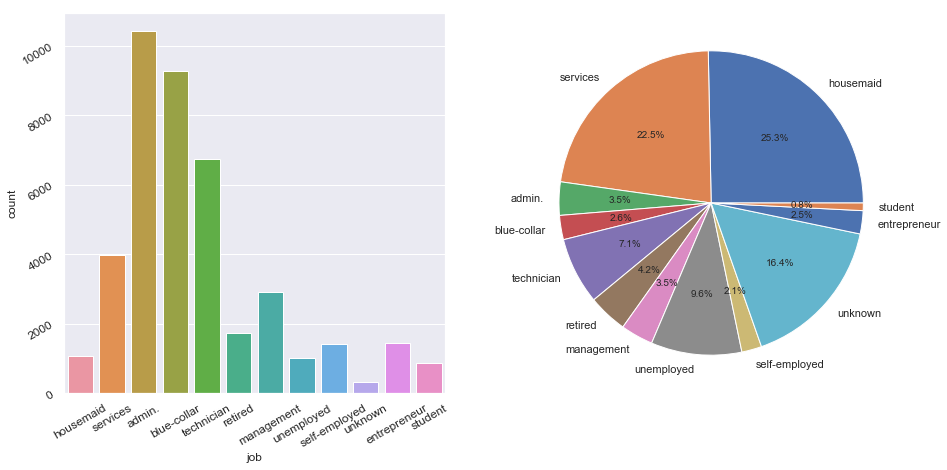

In [8]:
fig,(ax,ax2) = plt.subplots(nrows =1, ncols=2, figsize=(15,7))
sns.countplot(x = 'job', data =data, ax=ax)
ax.tick_params(labelsize =12,rotation=30)

ax2.pie(x =data.groupby('job')['job'].count().tolist(),labels =data['job'].unique().tolist(), autopct='%1.1f%%')

### 1.3.- Marital
 * intentaremos encontrar informacion util de este campo

([<matplotlib.patches.Wedge at 0x20c1d907b38>,
 [Text(1.0326377790368857, 0.3790240326229566, 'married'),
  Text(-0.945359240951554, 0.5624019074892099, 'single'),
  Text(0.6884596297210146, -0.8579180253639643, 'divorced'),
  Text(1.09997952296094, -0.006711860146294742, 'unknown')],
 [Text(0.5632569703837558, 0.20674038143070356, '11.2%'),
  Text(-0.5156504950644839, 0.3067646768122963, '60.5%'),
  Text(0.3755234343932806, -0.4679552865621623, '28.1%'),
  Text(0.5999888307059671, -0.0036610146252516766, '0.2%')])

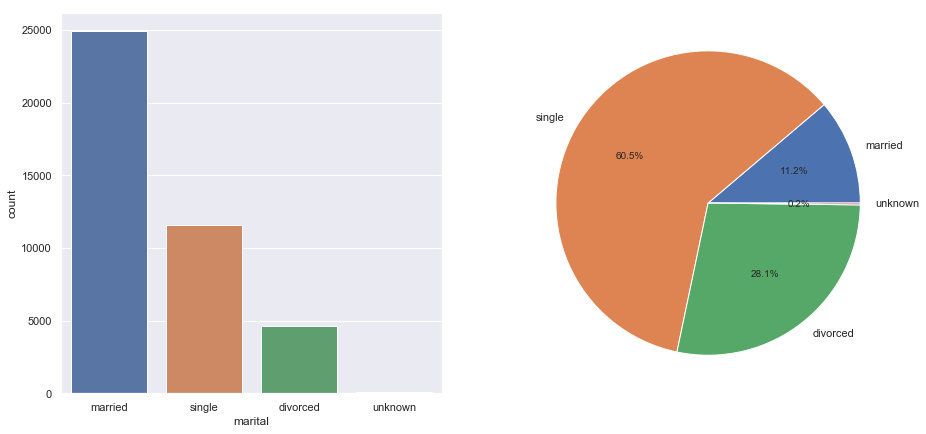

In [9]:
fig, (ax,ax2) = plt.subplots(nrows =1, ncols=2, figsize=(15,7))
sns.countplot(x = 'marital', data =data, ax=ax)
data['marital']

ax2.pie(x=data.groupby('marital')['marital'].count().tolist(),labels =data['marital'].unique().tolist(), autopct='%1.1f%%')

### 1.4.- Education
 * intentaremos encontrar informacion util de este campo

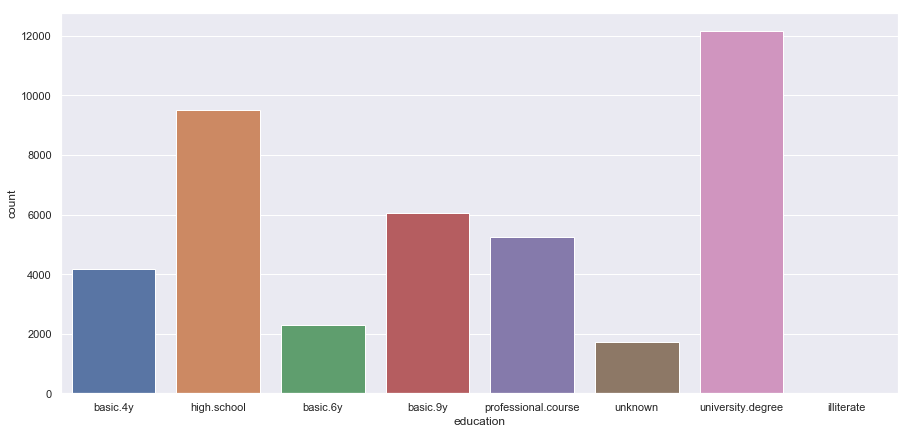

In [10]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data['education'])

### 1.5.- Default(has a credit?), House(housing loan?), Loan(personal Loan)
 * intentaremos encontrar informacion util de este campo

Text(0.5, 1.0, 'Has personal Loan?')

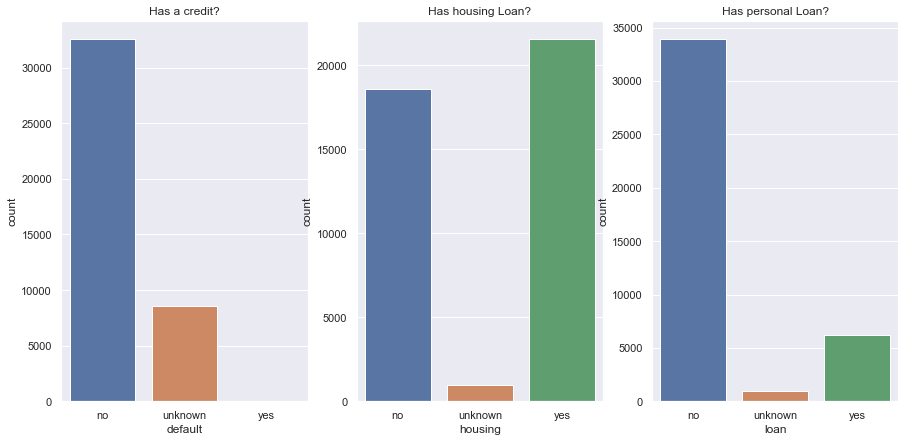

In [11]:
fig,(ax,ax1,ax2)= plt.subplots(nrows =1, ncols=3, figsize=(15,7))

sns.countplot(x= data['default'],ax=ax, order=['no', 'unknown', 'yes'])

ax.set_title('Has a credit?')

sns.countplot(x= data['housing'],ax=ax1, order=['no', 'unknown', 'yes'])

ax1.set_title('Has housing Loan?')

sns.countplot(x= data['loan'],ax=ax2, order=['no', 'unknown', 'yes'])

ax2.set_title('Has personal Loan?')


### 1.6.- contact, month, day_week
 * intentaremos encontrar informacion util de este campo

Text(0.5, 1.0, 'Has personal Loan?')

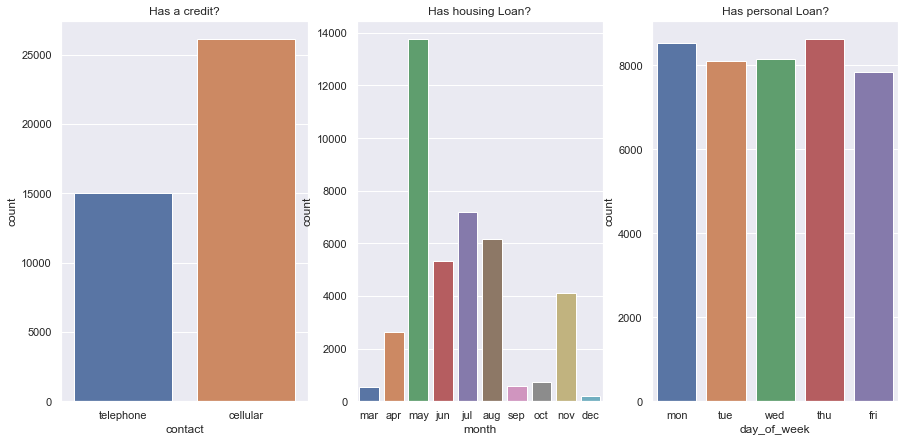

In [12]:
fig,(ax,ax1,ax2)= plt.subplots(nrows =1, ncols=3, figsize=(15,7))

sns.countplot(x= data['contact'],ax=ax)

ax.set_title('Has a credit?')

sns.countplot(x= data['month'],ax=ax1,order=['mar','apr','may','jun','jul','aug', 'sep','oct','nov','dec'])

ax1.set_title('Has housing Loan?')

sns.countplot(x= data['day_of_week'],ax=ax2)

ax2.set_title('Has personal Loan?')

In [13]:
corr= data.corr() # veamos el grafico de correlacion

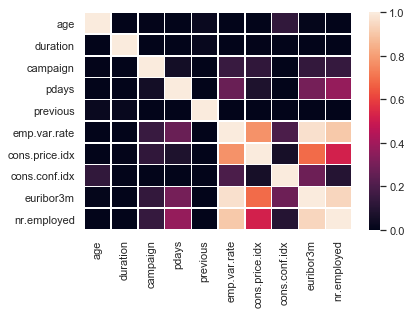

In [14]:
ax = sns.heatmap(corr, linewidths=.5,vmin=0, vmax=1) 

podemos ver que hay muy pocas variables con correlacion, eso es bueno puesto que trabajaremos con variables categoricas en su mayoria

 Como siguiente paso nos aseguraremos de solo tener terminos numericos en las variables categoricas
 ocuparemos variables Dummy para lograr esto

In [15]:
columns_to_dummy=[ 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome','day_of_week'] # columnas utiles para generar sus dummies
dummys = pd.get_dummies(data[columns_to_dummy])# generamos las variables dummy
new_data = pd.concat([dummys, data], axis=1)# juntamos las variables dummy con neustro dataset original
new_data = new_data.drop(['job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome','y','day_of_week'],axis=1)# eliminamos las variables innecesarias


In [16]:
new_data.head(5)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,1,0,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,1,0,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,1,0,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


# 2.- Feature importance
* Vamos a aplicar Random Forest para poder diferenciar las variables mas utiles al momento de entrenar nuestro modelo*

In [17]:
#para manejas la clasificacion es necesario tener valores numericos , procederemos a obtener las variables Dummy

In [18]:

from sklearn.ensemble import ExtraTreesClassifier
X=new_data
y= data['y'].map({'yes': 1, 'no': 0}) # Mapeamos 'yes' -> 1  y 'no' -> 0

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Importancia:")

for f in range(10):
    print("%d.  %s (%f)" % (f + 1, new_data.columns[indices[f]], importances[indices[f]]))



Importancia:
1.  duration (0.219806)
2.  euribor3m (0.078910)
3.  age (0.074926)
4.  campaign (0.055069)
5.  pdays (0.038495)
6.  nr.employed (0.032855)
7.  poutcome_success (0.028961)
8.  emp.var.rate (0.022073)
9.  housing_no (0.016995)
10.  housing_yes (0.016878)


 Con esta informacion obtendremos la importancia que cada variable tiene al momento de la clasificacion en el problema


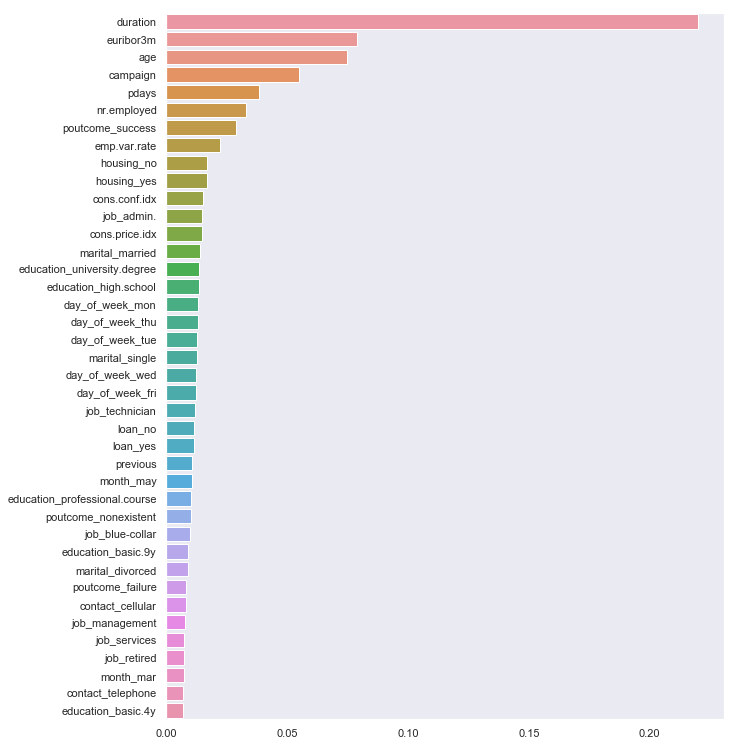

In [19]:
sns.set(style='dark')
ax = sns.barplot(importances[indices[:40]],new_data.columns[indices[:40]], orient='h')
fig = plt.gcf()
fig.set_size_inches(10,13)


# 3.-Train Model

Por la naturaleza del problema podemos decir que un modelo de regreession Logistica sera lo mas apropiado y eficiente por las siguientes razones.
* La variable dependiente es dicotomica(Binaria).
* Hay suficientes datos para entrenarla de forma efectiva.
* Hay sufientes features para poder lograr un buen resultado.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)# Obtenemos neustro data train y data test

In [22]:
from sklearn.linear_model import LogisticRegression #importamos el modelo con al herramienta de sklearn

In [23]:
clf = LogisticRegression(solver='liblinear',verbose=True, multi_class='ovr')

In [24]:
clf.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=True, warm_start=False)

In [25]:
y_pred = clf.predict(X_test)

# 4.- Validacion
* Realizaremos una validacion De F1score.
 * un buen puntaje de F1 significa que tiene bajos falsos positivos y bajos falsos negativos, por lo que está identificando       correctamente las amenazas reales y no le molestan las falsas alarmas.

In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy score: ', accuracy_score(y_test,y_pred))

Accuracy score:  0.9107388524722829


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10704,   264],
       [  839,   550]], dtype=int64)

In [28]:
True_positives = 1064
True_negatices= 59
False_positive= 41
False_negative= 72

##### Precision:
que tan bueno es el modelo para  predecir los casos positivos, y que sean correctos.

In [29]:
precision = True_positives/(True_positives+False_positive)
print('Precision:' , precision)

Precision: 0.96289592760181


##### Recall:
De la prediccion negativa 0, que fraccion la detectamos como negativa y es correcta.

In [30]:
Recall = True_positives/(True_positives+ False_negative)
print('Recall: ',Recall)

Recall:  0.9366197183098591


##### F1 score:

In [31]:
F1_score = 2*(precision* Recall/(precision+Recall))

In [32]:
print('El F1score: ', F1_score)


El F1score:  0.9495760821062026
